<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/2-ML%20/32-RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
df['PAY_AVR'] = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

In [9]:
columns = list(df.columns)

In [10]:
columns = ['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
  'PAY_AVR',
 'default.payment.next.month'
]

In [11]:
sort_col = sorted(columns)

df_sort = df[sort_col]

In [12]:
df_sort.columns

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'EDUCATION', 'ID', 'LIMIT_BAL', 'MARRIAGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_AVR', 'SEX',
       'default.payment.next.month'],
      dtype='object')

In [13]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

In [ ]:
#df.describe()

In [14]:
X = df.drop('default.payment.next.month', axis =1).values
y = df['default.payment.next.month'].values
print(X.shape)
print(y.shape)

(30000, 25)
(30000,)


Split my data into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

Instantiate the random forest model with 200 trees

In [16]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [18]:
y_predict = rf.predict(X_test)

Check feature importance


In [ ]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

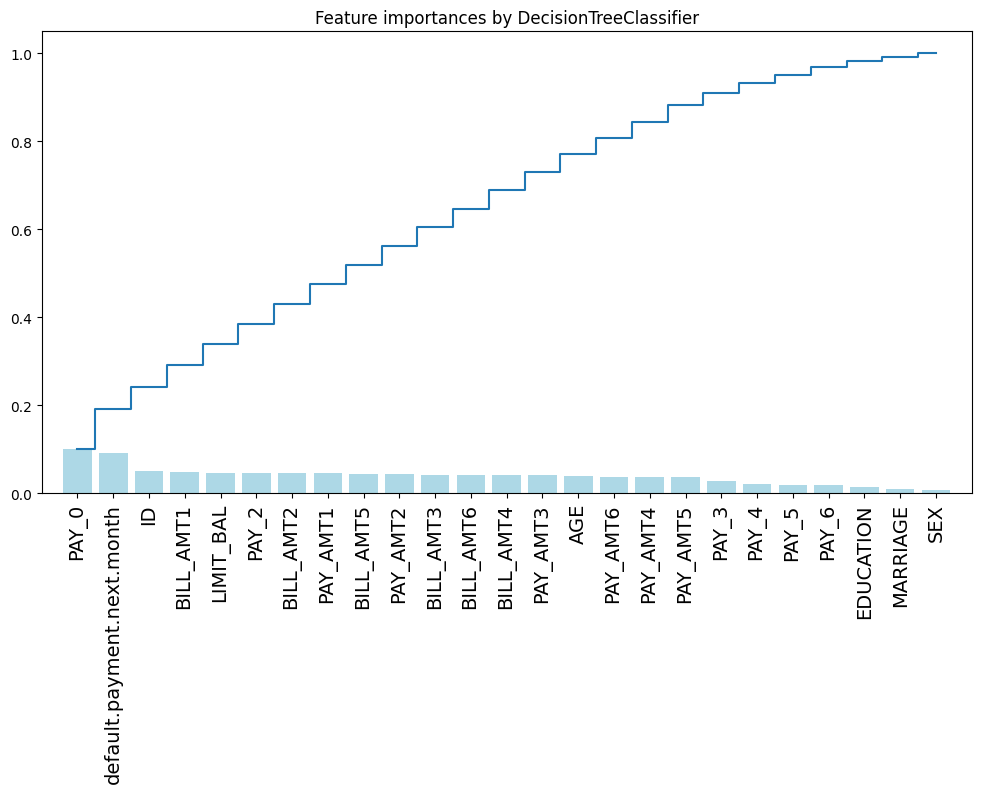

In [20]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [21]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [22]:
X_test.shape

(9000, 25)

In [23]:
#Make my predictions
y_prediction = rf.predict(X_test)

In [24]:
y_probability = rf.predict_proba(X_test)

In [25]:
y_probability.shape

(9000, 2)

In [26]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.36122448979591837


In [ ]:
y_prediction.reshape(-1,1)

In [ ]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

In [ ]:
# Creating confusion matrix would give us a ration of non-default compared
# to default.

In [28]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6680  360]
 [1252  708]]


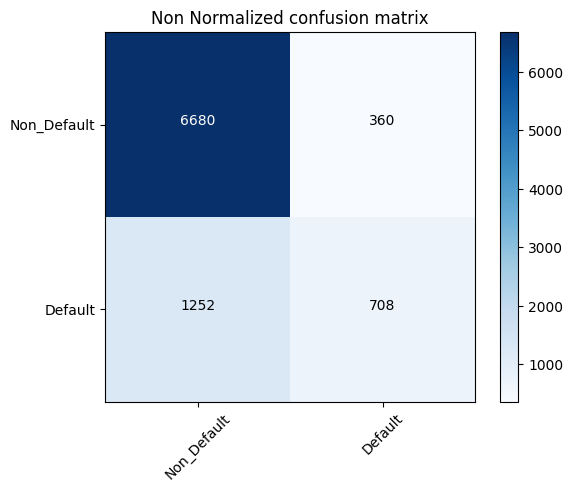

In [30]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')